In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn  # if you use JupiterHub
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from numpy import linalg as LA

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 3, 20]
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

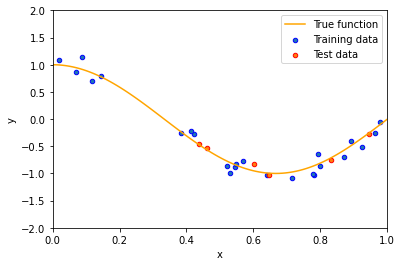

In [3]:
plt.figure()
X_true = np.linspace(0, 1, 100)
plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Training data")
plt.scatter(X_test, y_test, edgecolor='r', s=20, label="Test data")
plt.plot(X_true, true_fun(X_true), color='orange', label="True function")
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.show()

In [4]:
Test_MSE = []
Training_MSE = []

for i in range(1, 20):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ])

    model = pipeline.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
    model.predict(X_test.reshape(-1, 1))

    Test_MSE.append(
        LA.norm(model.predict(X_test.reshape(-1, 1)) - y_test.reshape(-1, 1), 2)
    )
    Training_MSE.append(
        LA.norm(model.predict(X_train.reshape(-1, 1)) - y_train.reshape(-1, 1), 2)
    )


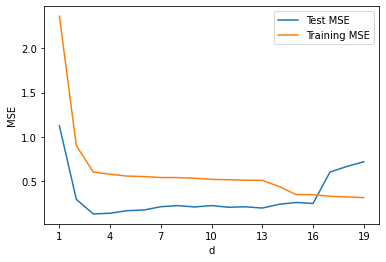

In [5]:
plt.figure()
plt.plot(range(1, 20), Test_MSE)
plt.plot(range(1, 20), Training_MSE)
plt.xlabel("d")
plt.ylabel("MSE")
plt.xticks(range(1, 20, 3))
plt.legend(loc="best", labels=["Test MSE", "Training MSE"])
plt.show()


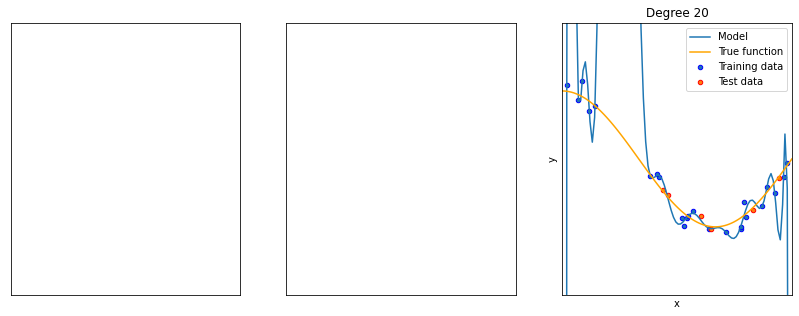

In [14]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ])

    model = pipeline.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
    model.predict(X_test.reshape(-1, 1))

# Evaluate the models using cross-validation
X_true = np.linspace(0, 1, 100)
plt.plot(X_true, pipeline.predict(X_true[:, np.newaxis]), label="Model")
plt.plot(X_true, true_fun(X_true), color='orange', label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Training data")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test data")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}".format(degrees[i]))
plt.show()


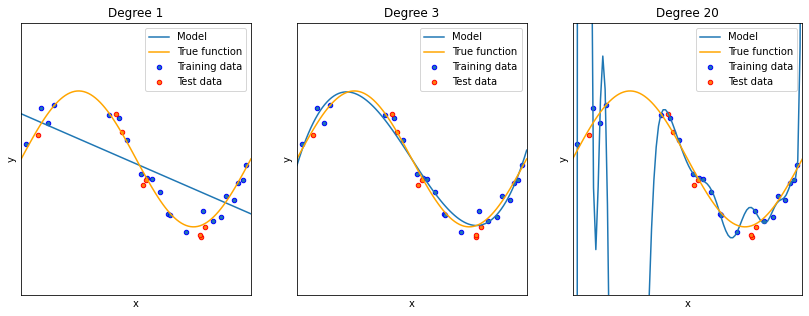

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# --- Données de base ---
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1

# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fonction réelle
def true_fun(X):
    return np.sin(2 * np.pi * X)

# --- Différents degrés ---
degrees = [1, 3, 20]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ])

    pipeline.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

    X_true = np.linspace(0, 1, 100)
    plt.plot(X_true, pipeline.predict(X_true[:, np.newaxis]), label="Model")
    plt.plot(X_true, true_fun(X_true), color='orange', label="True function")
    plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Training data")
    plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test data")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}".format(degrees[i]))

plt.show()


In [19]:
print(Test_MSE)

[1.1223161638873047, 0.2909563301186458, 0.12584654497023878, 0.13344339157975135, 0.16255608798182825, 0.16987838094881233, 0.20775602182253786, 0.22008229764875856, 0.20461928215591263, 0.22015936280578127, 0.20157313917520314, 0.2062840653894505, 0.19220259843183682, 0.23528541075579026, 0.25557639897308737, 0.24426751331261376, 0.5995325777285393, 0.6632428251407879, 0.7164406829582116]
